Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular
3. Usando o computador para desenhar
    1. **Traçando secantes e tangentes (derivadas)**
    1. **Animações e aproximações: algoritmo de secantes para achar zeros _vs_ Newton**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Diferenças centrais

Se uma função é apenas derivável, o quociente fundamental é a única ferramenta que temos
para aproximar a derivada.

Entretanto, pode acontecer que tenhamos funções mais vezes deriváveis.
Assim, um outro quociente fundamental é
$$ f'(x) = \lim _ {h \to 0} \frac{f(x+h) - f(x-h)}{2h}. $$
Ao usar as fórmulas de Taylor acima até a ordem 2 para calcular as aproximações,
vemos que os termos de ordem *par* se anulam:
$$ \begin{align}
\frac{f(x+h) - f(x-h)}{2h}
   & = \frac{\big(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(\xi _ +) \big)
           - \big( f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(\xi _ -) \big)}{2h} \\
   & = f'(x) + \frac{h^2}{6} \frac{f'''(\xi _ +) + f'''(\xi _ -)}{2} \sim  f'(x) + \frac{h^2}{6} f'''(x).
\end{align} $$
Assim, este método é bem melhor do que o anterior quando a função é duas vezes derivável.

In [2]:
def df_sym(f,x,eps=1e-5):
    return (f(x+eps) - f(x-eps))/(2*eps)

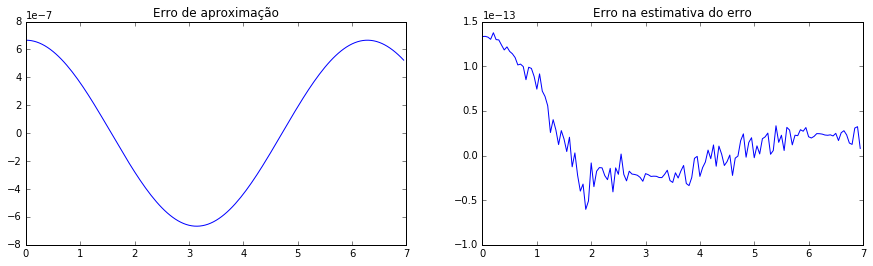

In [3]:
h = 0.2e-2
x = arange(0., 7., 0.05)
dfx = cos(x)
dfx_approx_3 = df_sym(sin,x,eps=h)

figure(figsize=(15,4))
subplot(1,2,1)
title('Erro de aproximação')
plot(x, dfx - dfx_approx_3);

subplot(1,2,2)
title('Erro na estimativa do erro')
plot(x, (dfx_approx_3 - dfx) - (-(h ** 2) * cos(x)/6));

### Exercício

Use derivadas centrais para estimar a derivada segunda.
Fica melhor do que as derivadas laterais da aula passada?

# O método da secante

## Uma novidade: funções que retornam funções

Pode parecer estranho a primeira vista, pois estamos acostumados a que uma função retorne um "valor",
algo como um número, uma _string_, uma lista, ...
Mas em Python podemos retornar uma função, isso também é um "valor" aceitável de retorno.
O caso básico de utilização desta idéia é construir uma função _diferente_ para situações diferentes.

Vejamos como isso se aplica na secante: a secante é dada por dois pontos
$(x, f(x))$ e $(y, f(y))$.
Mas, para desenhar a secante junto com o gráfico da função,
precisamos da **função afim** correspondente.
Assim, dadas a função $f$ e as duas abscissas $x$ e $y$,
construimos a função afim e retornamos a mesma.

In [4]:
def sec(f,x,y):
    base = f(x)
    incl = (f(y) - f(x))/(y - x)
    def linha(z):
        return (z - x)*incl + base
    return linha

In [8]:
secantes = []
for alvo in [2, 1, 0.5, 0.1]:
    secantes.append( (alvo, sec(cos,0,alvo)) )

secantes

[(2, <function __main__.sec.<locals>.linha>),
 (1, <function __main__.sec.<locals>.linha>),
 (0.5, <function __main__.sec.<locals>.linha>),
 (0.1, <function __main__.sec.<locals>.linha>)]

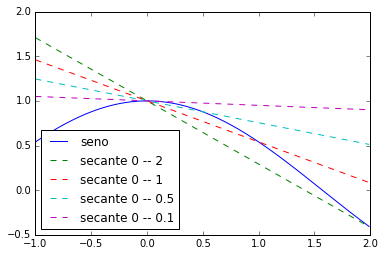

In [9]:
x = arange(-1, 2, 0.01)
plot(x, cos(x), label='seno')
for (alvo,s) in secantes:
    plot(x, s(x), '--', label='secante 0 -- {}'.format(alvo))
legend(loc=0);

# O método de Newton com aproximação da secante

Podemos modificar o método de Newton para que ele calcule não a derivada (que podemos não saber calcular de forma simples!)
mas uma aproximação da mesma.
Temos assim um método dependendo de dois valores:
$$z = x - \frac{f(x)}{\frac{f(y) - f(x)}{y - x}} = x - \frac{f(x)\big( y - x \big)}{f(y) - f(x)} = \frac{x f(y) - y f(x)}{f(y) - f(x)}$$
onde $y$ é um outro ponto.
No caso de um método iterativo, podemos usar outros pontos de $f$ já calculados!

In [7]:
def newton_sec(f,x,y, tol=1e-10, maxiter=100):
    prox = (x*f(y) - y*f(x))/(f(y) - f(x))
    if abs(prox - y) < tol: # Erro pequeno: convergiu
        return prox
    if maxiter == 0: # Não convergiu
        return prox
    
    return newton_sec(f,y,z,tol, maxiter-1)

## Performance

O "método da secante", como é conhecido, converge mais lentamente do que o método de Newton:
podemos mostrar que os erros $e_i$ satisfazem uma "recorrência de desigualdade":
$$ e_{n+1} < C (e_n \cdot e_{n-1}). $$
Mas, como este calcula menos vezes a função, ele converge mais rápido por número de chamadas a $f$.

### Exercício: Fazer uma comparação entre as velocidades de Newton e da Secante.

Comece fazendo um gráfico simples, com a precisão da resposta em função do número de passos.
Em seguida, faça o gráfico da precisão em função do número de vezes que a função $f$ é calculada.

Se tiver tempo, faça desenhos indicando os pontos das iterações.
Enfim, se você tiver mais tempo ainda, anime o desenho "ao longo do tempo":
faça aparecer os pontos de Newton e da secante "na ordem em que foram obtidos"
(em função do número de vezes que $f$ foi calculada).